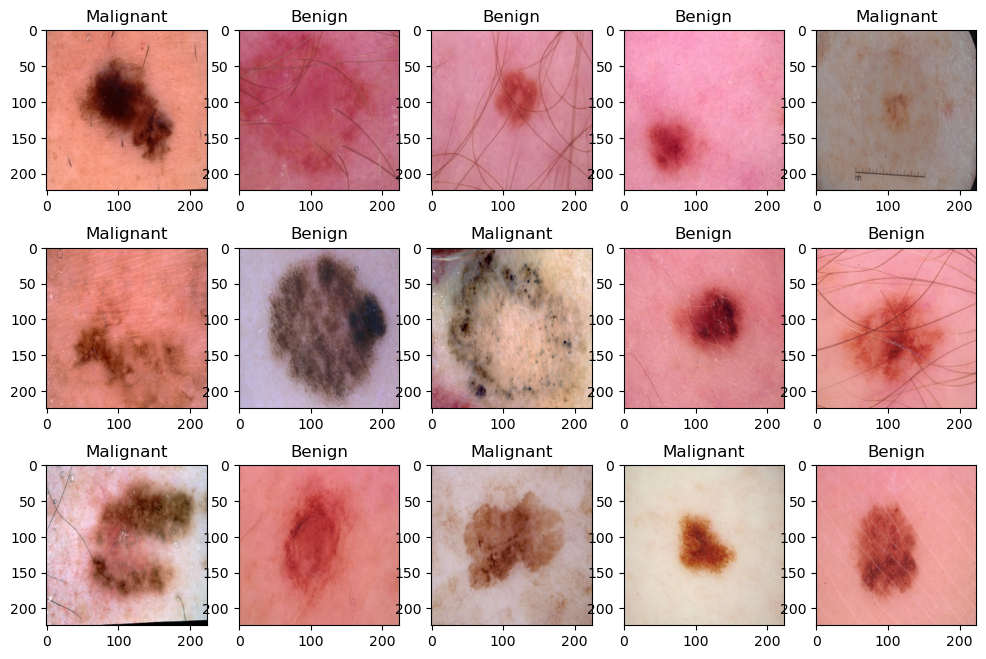

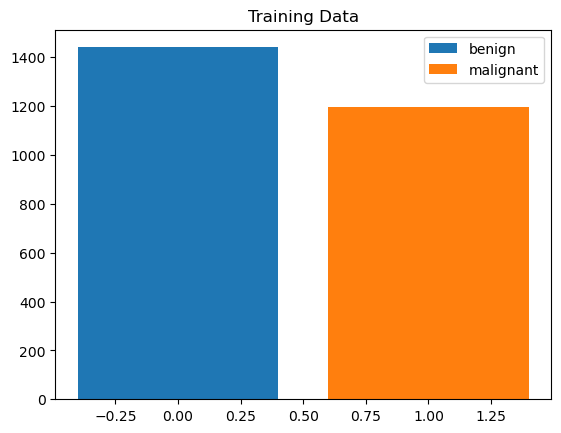

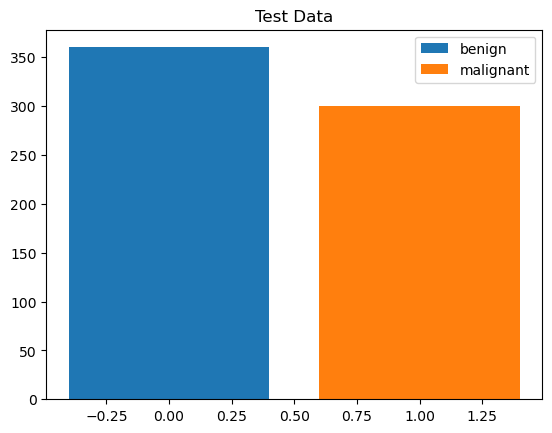

[[0.87058824 0.75686275 0.77647059 ... 0.85098039 0.66666667 0.69803922]
 [0.02352941 0.         0.         ... 0.05490196 0.         0.        ]
 [0.76862745 0.43529412 0.5254902  ... 0.70196078 0.41568627 0.49019608]
 ...
 [0.89803922 0.54117647 0.61176471 ... 0.8        0.52156863 0.5372549 ]
 [0.         0.01176471 0.01960784 ... 0.77254902 0.77254902 0.78039216]
 [0.39215686 0.41176471 0.33333333 ... 0.32156863 0.29019608 0.23921569]]
x_test= 660
[0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.

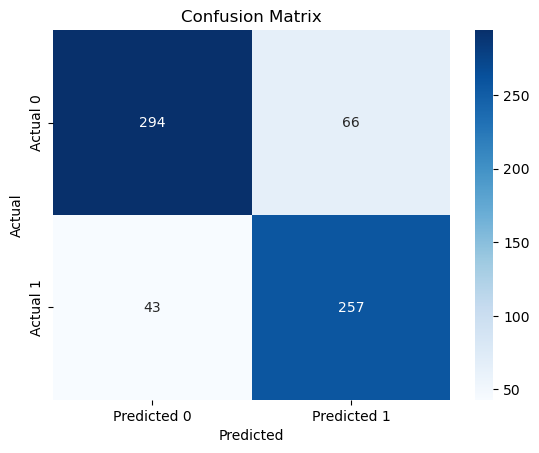

Model saved as SkinCancerDetection.joblib


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import cv2
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
folder_benign_train = 'train/benign'
folder_malignant_train = 'train/malignant'

folder_benign_test = 'test/benign'
folder_malignant_test = 'test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')



# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

# Display first 15 images of moles, and how they are classified
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i])
plt.show()

plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

X_train = X_train/255.
X_test = X_test/255.

# support vector machine classifier
from sklearn.svm import SVC

model = SVC(kernel="")
print(X_train.reshape(X_train.shape[0],-1))
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)
# Train the support vector machine classifier
model = SVC(kernel="linear", probability=True)  # Use linear kernel for decision_function and enable probability estimates
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

# Compute the decision function values (distance to the separating hyperplane)
decision_values = model.decision_function(X_train.reshape(X_train.shape[0],-1))

# Compute hinge loss for training set
hinge_losses_train = hinge_loss(y_train, decision_values)

# Plot the loss curve
plt.plot(hinge_losses_train, label='Training Loss')
plt.xlabel('Sample Index')
plt.ylabel('Hinge Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

# Print accuracy, precision, recall, f1-score, and support
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
support = np.unique(y_test, return_counts=True)[1]

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Support:", support)

# Create a bar plot for accuracy, precision, recall, f1-score, and support
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Support']
metrics_values = [accuracy, precision, recall, f1, support[1]]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
model_filename = 'SkinCancerDetection.joblib'
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")